In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('dataset_2.csv')

In [4]:
reg = LinearRegression()
reg.fit(df[['ShearRate']] ** 0.5, df.Stress ** 0.5)

LinearRegression()

In [9]:
viscosity = reg.coef_[0] ** 2
yield_stress = reg.intercept_ ** 2
shear_rates = np.linspace(100, 150, 200)

In [12]:
def casson_model(shear_rates):
    vs = viscosity
    ys = yield_stress
    return ys + vs * shear_rates + 2 * np.math.pow(ys * vs * shear_rates, 0.5)

casson = np.vectorize(casson_model)

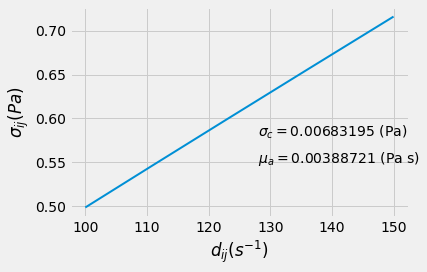

In [28]:
with plt.style.context('fivethirtyeight'):
    plt.plot(shear_rates, casson(shear_rates), linewidth=2)
    plt.xlabel('$d_{ij} (s^{-1})$')
    plt.ylabel('$\sigma_{ij} (Pa)$')
    plt.text(128, 0.58, f'$\sigma_c = {yield_stress:.8f}$ (Pa)')
    plt.text(128, 0.55, f'$\mu_a = {viscosity:.8f}$ (Pa s)')
    plt.tight_layout()
    plt.savefig('casson_rheogram.png', transparent=True)
    plt.show()